<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />MSc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Themen dieses Notebooks:** "Messdaten" herunterladen, Visualisieren, Fehlerfortpflanzung, Parameterbestimmung durch Fitten, LaTeX-kompatible Ausgabe

## Beschreibung des (Gedanken-)Experiments

Im Folgenden wollen wir erarbeiten, wie man experimentelle Daten, die zum Beispiel während eines Praktikumsversuchs gewonnen wurden, mit Julia verarbeiten kann. Ein im Grundstudium häufig durchgeführtes Experiment ist das [Pohlsche Rad](https://de.wikipedia.org/wiki/Pohlsches_Rad) als Beispiel für resonante und chaotische Schwingvorgänge.

Daran angelehnt betrachten wir die folgende Differentialgleichung eines **getriebenen, gedämpften Oszillators**,

$\quad m\ddot{x} + \gamma\dot{x}+kx = F\sin(\omega t).$

### Wir machen zwei Versuche:

1. Wir schalten Dämpfung und Triebkraft aus ($\gamma = 0, F = 0$) und bestimmen die Masse $m$ und Schwingungsperiode $T$ des freien Oszillators.
2. Wir treiben den gedämpften Oszillator mit der konstanten Kraft $F$ bei variierenden Frequenzen $\omega$ und messen die Amplitude $A$ der Oszillation.

Aus den Ergebnissen zu 1 können wir die Federkonstante $k$ berechnen.

Aus den Ergebnissen zu 2 können wir die Dämpfung $\gamma$ bestimmen.

### "Messdaten" herunterladen:

**CSV Datei** ("Comma-separated values") mit Daten der Massen- und **Periodenmessung** (Versuch 1): https://tinyurl.com/y3bbrklk

**Excel Datei** mit Daten der **Resonanzmessung** (Versuch 2): https://tinyurl.com/y5t3qjkb

In [1]:
download("http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2020/period.csv", "period.csv")
download("http://www.thp.uni-koeln.de/trebst/Lectures/CompPhys-2020/resonance.xlsx", "resonance.xlsx");

In [8]:
using CSVFiles, DataFrames

Links: **[CSVFiles.jl](https://github.com/queryverse/CSVFiles.jl), [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)** ([Dokumentation](http://juliadata.github.io/DataFrames.jl/stable/))

In [9]:
period_data = DataFrame(load("period.csv"))

10×4 DataFrame
│ Row │ m       │ ∆m      │ T       │ ∆T      │
│     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 1.33    │ 0.05    │ 7.75    │ 0.05    │
│ 2   │ 1.33    │ 0.05    │ 7.51    │ 0.05    │
│ 3   │ 1.33    │ 0.05    │ 7.41    │ 0.05    │
│ 4   │ 1.34    │ 0.05    │ 7.44    │ 0.05    │
│ 5   │ 1.34    │ 0.05    │ 7.48    │ 0.05    │
│ 6   │ 1.34    │ 0.05    │ 7.56    │ 0.05    │
│ 7   │ 1.37    │ 0.05    │ 7.3     │ 0.05    │
│ 8   │ 1.34    │ 0.05    │ 7.6     │ 0.05    │
│ 9   │ 1.38    │ 0.05    │ 7.14    │ 0.05    │
│ 10  │ 1.37    │ 0.05    │ 7.2     │ 0.05    │

In [10]:
period_data[:,1]

10-element Array{Float64,1}:
 1.33
 1.33
 1.33
 1.34
 1.34
 1.34
 1.37
 1.34
 1.38
 1.37

In [11]:
period_data.m

10-element Array{Float64,1}:
 1.33
 1.33
 1.33
 1.34
 1.34
 1.34
 1.37
 1.34
 1.38
 1.37

Die Daten zu Versuch 2 (Resonanzmessung) liegen z.B. in einer Excel Datei `daten.xlsx` vor.

In [12]:
using ExcelFiles

Links: **[ExcelFiles.jl](https://github.com/queryverse/ExcelFiles.jl)**

In [13]:
resonance_data = DataFrame(load("resonance.xlsx", "Resonanzmessung!A2:C85"))

83×3 DataFrame
│ Row │ Motorfrequenz │ Amplitude │ Fehler  │
│     │ Float64       │ Float64   │ Float64 │
├─────┼───────────────┼───────────┼─────────┤
│ 1   │ 0.61          │ 3.68953   │ 0.2     │
│ 2   │ 0.62          │ 3.57177   │ 0.2     │
│ 3   │ 0.63          │ 3.90793   │ 0.2     │
│ 4   │ 0.64          │ 3.94064   │ 0.2     │
│ 5   │ 0.65          │ 4.14521   │ 0.2     │
│ 6   │ 0.66          │ 4.41862   │ 0.2     │
│ 7   │ 0.67          │ 4.38976   │ 0.2     │
│ 8   │ 0.68          │ 4.78046   │ 0.2     │
│ 9   │ 0.69          │ 5.09132   │ 0.2     │
│ 10  │ 0.7           │ 5.46904   │ 0.2     │
⋮
│ 73  │ 1.33          │ 1.2071    │ 0.2     │
│ 74  │ 1.34          │ 1.20216   │ 0.2     │
│ 75  │ 1.35          │ 1.0389    │ 0.2     │
│ 76  │ 1.36          │ 0.965221  │ 0.2     │
│ 77  │ 1.37          │ 0.91651   │ 0.2     │
│ 78  │ 1.38          │ 1.08663   │ 0.2     │
│ 79  │ 1.39          │ 0.934463  │ 0.2     │
│ 80  │ 1.4           │ 0.894263  │ 0.2     │
│ 81  │ 1.41          │ 0.900934  │ 0.2     │
│ 82  │ 1.4           │ 1.07006   │ 0.2     │
│ 83  │ 1.5           │ 0.703437  │ 0.2     │

In [14]:
ω = resonance_data[:,1]
A = resonance_data[:,2]
ΔA = resonance_data[:,3];

## Visualisieren

In [15]:
using PyPlot

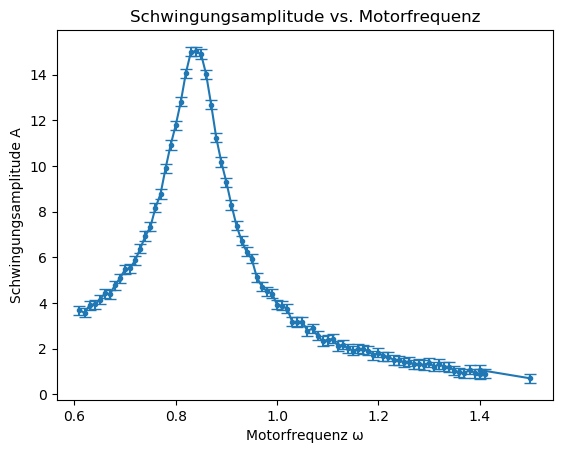

PyObject Text(24.00000000000002, 0.5, 'Schwingungsamplitude A')

In [16]:
errorbar(ω, A, yerr=ΔA, marker=".")

title("Schwingungsamplitude vs. Motorfrequenz")
xlabel("Motorfrequenz ω")
ylabel("Schwingungsamplitude A")

# 3. Federkonstante $k$ bestimmen (Automatische Fehlerfortpflanzung)

In [17]:
using Measurements
import Measurements: value, uncertainty

Links: **[Measurements.jl](https://github.com/JuliaPhysics/Measurements.jl)** ([Dokumentation](https://juliaphysics.github.io/Measurements.jl/stable/))

In [18]:
x = measurement(1.2, 0.1)

1.2 ± 0.1

In [19]:
y = measurement(4.1, 0.2)

4.1 ± 0.2

In [20]:
x + y

5.3 ± 0.22

In [21]:
x * y

4.92 ± 0.48

In [22]:
z = sqrt(x + y)

2.302 ± 0.049

In [23]:
value(z)

2.3021728866442674

In [24]:
uncertainty(z)

0.04856429311786322

Wir führen nun die Werte und Fehlerinformationen unserer Daten in `Measurements` zusammen.

In [25]:
mass_data = measurement.(period_data.m, period_data.∆m)

10-element Array{Measurement{Float64},1}:
 1.33 ± 0.05
 1.33 ± 0.05
 1.33 ± 0.05
 1.34 ± 0.05
 1.34 ± 0.05
 1.34 ± 0.05
 1.37 ± 0.05
 1.34 ± 0.05
 1.38 ± 0.05
 1.37 ± 0.05

In [26]:
T_data = measurement.(period_data.T, period_data.∆T)

10-element Array{Measurement{Float64},1}:
 7.75 ± 0.05
 7.51 ± 0.05
 7.41 ± 0.05
 7.44 ± 0.05
 7.48 ± 0.05
 7.56 ± 0.05
  7.3 ± 0.05
  7.6 ± 0.05
 7.14 ± 0.05
  7.2 ± 0.05

In [28]:
using Statistics

Links: [Statistics](https://docs.julialang.org/en/latest/stdlib/Statistics/) (Standard Library = Paket das mit Julia ausgeliefert wird (keine Installation notwendig))

In [29]:
mass_mean = mean(mass_data)

1.347 ± 0.016

In [30]:
T_mean = mean(T_data)

7.439 ± 0.016

Aus `mass_mean` und `T_mean` können wir nun die Federkonstante samt Fehler bestimmen.

$T = 2\pi\sqrt{\dfrac{m}{k}} \ \  \Rightarrow \ \ k = \left( \dfrac{2\pi}{T} \right)^2 m$

In [31]:
k_measurement = (2 * pi / T_mean)^2 * mass_mean

0.961 ± 0.012

## 4. Bestimmen von $\gamma$ (Fitten)

Aus der exakten Lösung der Bewegungsgleichung wissen wir, dass die Amplitude die folgende Form besitzt:

$\quad A = \dfrac{F}{\sqrt{m^2 (\frac{k}{m} - \omega^2)^2 + \gamma^2 \omega^2}}$

Bis auf die Dämpfung $\gamma$ kennen wir alle Größen. Wir können diese Relation also an die Daten fitten und $\gamma$ extrahieren.

In [32]:
using LsqFit

Links: [LsqFit.jl](https://github.com/JuliaNLSolvers/LsqFit.jl)

In [33]:
F = 1.69 # konstante Kraft
m = value(mass_mean)
k = value(k_measurement)

# Fit definieren
# p = Parameter des Fits (Array)
function model(ω, p)
    γ = p[1]
    @. F / sqrt(m^2 * (k / m - ω^2)^2 + γ^2 * ω^2)
end

model (generic function with 1 method)

In [34]:
fit = curve_fit(model, ω, A, [0.5])

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([0.13372402632840724], [-0.06996415076804174, 0.1767385273367772, -0.018972589127908, 0.10177346811806576, 0.06545120199960497, -0.02282519085884349, 0.21052148083943578, 0.046643907134500395, -0.01150309727971166, -0.1063037970852907  …  -0.05148707946502684, 0.08415169014570822, 0.1313024388562578, 0.1545262404007266, -0.040099978825022475, 0.08848758096296694, 0.10598551452057625, 0.0774446539210849, -0.0698119106150219, 0.10925770891759556], [-0.8261642723283051; -0.9479682204217945; … ; -0.09183665926139391; -0.05654580155106663], true, Float64[])

In [35]:
γ = coef(fit)[1]
println("γ = ", γ)

γ_err = stderror(fit)[1]
println("γ_err = ", γ_err)

γ = 0.13372402632840724
γ_err = 0.0006452932270736695


# 5. Darstellung der Ergebnisse im $\LaTeX$ - Look + Speichern als PDF Datei

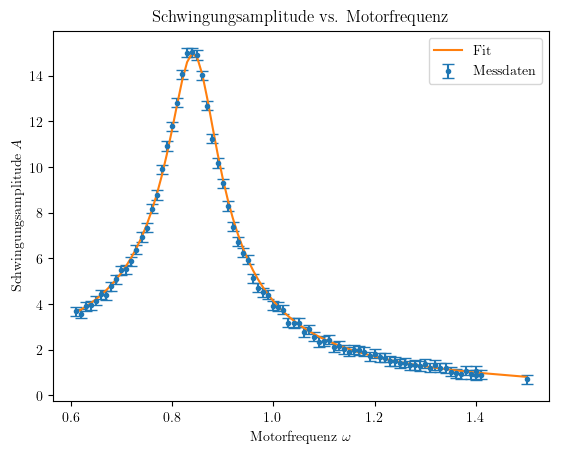

kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges
kpsewhich: security risk: running with elevated privileges


In [36]:
# LaTeX einschalten
rc("text", usetex=true)
rc("font", family="serif")

# Plot
errorbar(ω, A, yerr=ΔA, fmt=".", label="Messdaten")
plot(ω, model(ω, γ), label="Fit")

title("Schwingungsamplitude vs. Motorfrequenz")
xlabel(L"Motorfrequenz $\omega$") # das L steht für LaTeX String
ylabel(L"Schwingungsamplitude $A$")
legend()

#  Als PDF Datei speichern
savefig("Schwingungsamplitude.pdf")

In [ ]:
# LaTeX ausschalten
# rc("text", usetex=false)
# rc("font", family="sans-serif")

# 6. Wo findet man externe Julia Pakete?

Eine Übersicht von Paketen gibt es z.B. unter https://juliaobserver.com/ und https://pkg.julialang.org/docs/.

Viele Pakete sind in sogenannten GitHub Organisationen, z.B. JuliaMath oder JuliaQuantum, zusammengefasst. Diese sind auf https://julialang.org/community/ unter *Julia GitHub Groups* gelistet.

Hilfe und Informationen zu Paketen findet man auf deren Webseiten (auf github). Diese findet man z.B. indem man nach "**Paketname jl**" sucht.

Beispiel DataFrames: https://github.com/JuliaData/DataFrames.jl

In [37]:
@which curve_fit(model, ω, A, [0.5])

curve_fit(model, xdata::AbstractArray, ydata::AbstractArray, p0::AbstractArray; inplace, kwargs...) in LsqFit at C:\Users\carsten\.julia\packages\LsqFit\NjkFI\src\curve_fit.jl:106

In [38]:
@edit curve_fit(model, ω, A, [0.5])